# The bit-flip code 

In [42]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

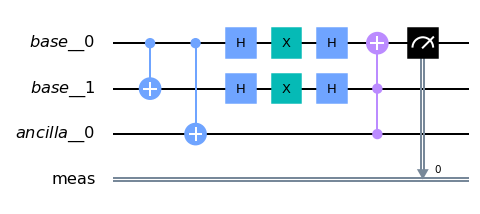

In [68]:
#Create quantum and classical registers
q = QuantumRegister(2,'base_')
a = QuantumRegister(1,'ancilla_')
c = ClassicalRegister(1,'meas')
#Create a quantum circuit
circ1= QuantumCircuit(q,a,c)
#Apply encoding using CNOT
circ1.cx(q[0],q[1])
#Apply bit flip error gate
circ1.cx(q[0],a[0])
#Apply Hadamard gate
circ1.h(q[0])
circ1.h(q[1])
#Apply bit flip error gate
circ1.x(q[0])
circ1.x(q[1])
#Apply Hadamard gate
circ1.h(q[0])
circ1.h(q[1])
#Apply Toffoli gate
circ1.ccx(a[0],q[1],q[0])
#Apply measurement
circ1.measure(q[0],c[0])
#Draw circuit
circ1.draw('mpl')

In [56]:
# Load account 
IBMQ.load_account()
IBMQ.providers() 
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_qasm_simulator')

job = execute(circ1, backend, shots=1024)
counts1 = job.result().get_counts(circ1)

print("Bit flip code with error")
print("*******************")
print(counts1)

C:\Users\dyona\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-02-20 22:44:06,710: Credentials are already in use. The existing account in the session will be replaced.


Bit flip code with error
*******************
{'0': 1024}


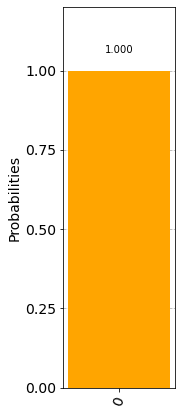

In [65]:
plot_histogram(counts1, figsize= (2,7), color = 'orange')